In [1]:
import pandas as pd
import matplotlib.pyplot as plot

df = pd.read_csv("D:\code\DAV_sem_5\project\Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


DATA CLEANING STEP 1
Dropping null values

In [2]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [3]:
df.dropna(inplace=True)

DATA CLEANING STEP 2 
Removing data inconsistency

In [4]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [5]:
df["Education Level"].replace("Master's Degree", "Master's", inplace=True)
df["Education Level"].replace("Bachelor's Degree", "Bachelor's", inplace=True)
df["Education Level"].replace("phD", "PhD", inplace=True)

In [6]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

Miscellaneous

In [7]:
print(df["Years of Experience"].max())

34.0


In [8]:
print(df["Years of Experience"].min())

0.0


In [9]:
print(df["Age"].min())

21.0


In [10]:
print(df["Age"].max())

62.0


In [11]:

results = df.loc[(df["Gender"] == "Other" )]
results

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2385,25.0,Other,High School,Full Stack Engineer,2.0,69032.0
2406,37.0,Other,Master's,Full Stack Engineer,14.0,161393.0
2448,31.0,Other,High School,Back end Developer,8.0,104127.0
2454,23.0,Other,High School,Front end Developer,2.0,62852.0
2458,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2465,25.0,Other,High School,Full Stack Engineer,2.0,69032.0
2486,37.0,Other,Master's,Full Stack Engineer,14.0,161393.0
2528,31.0,Other,High School,Back end Developer,8.0,104127.0
2534,23.0,Other,High School,Front end Developer,2.0,62852.0


DATA PRE-PROCESSING STEP 1
Data binning/discretization

In [12]:
df['Binned Y.O.E'] = pd.cut(df["Years of Experience"], bins= [0,2,5,15,35], labels = ["Fresher", "Junior", "Sub-Senior", "Senior"])
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Binned Y.O.E
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Junior
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Junior
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Sub-Senior
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sub-Senior
4,52.0,Male,Master's,Director,20.0,200000.0,Senior
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,Senior
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Junior
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,Junior
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0,Sub-Senior


DATA PREPROCESSING STEP 2
Data preprocessing by identifying outlier values

In [13]:
lower_limit = 30
upper_limit = 1
df2 = df.loc[(df["Age"] >= lower_limit) & (df["Years of Experience"] <= upper_limit )]
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Binned Y.O.E
3439,30.0,Male,High School,Junior HR Generalist,1.0,32000.0,Fresher
3558,30.0,Male,High School,Junior HR Generalist,1.0,32000.0,Fresher
4280,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher
4295,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher
4310,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher
4325,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher
4340,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher
4355,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher
4370,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher
4385,30.0,Female,High School,Junior Sales Associate,1.0,26000.0,Fresher


Dropping outlier data

In [14]:
df.drop(df2.index, inplace= True)
lower_limit = 30
upper_limit = 1
df2 = df.loc[(df["Age"] >= lower_limit) & (df["Years of Experience"] <= upper_limit )]
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Binned Y.O.E


DATA PREPROCESSING STEP 3 Data preprocessing by identifying outlier values

In [15]:
df3 = df.loc[(df["Age"] - df["Years of Experience"] <= 18 )]
df3

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Binned Y.O.E
2376,25.0,Male,PhD,Software Engineer Manager,12.0,169159.0,Sub-Senior
2456,25.0,Male,PhD,Software Engineer Manager,12.0,169159.0,Sub-Senior


Dropping outlier data

In [16]:
df.drop(df3.index, inplace= True)
df3 = df.loc[(df["Age"] - df["Years of Experience"] <= 18 )]
df3

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Binned Y.O.E


QUESTION 1 : Show the effect of degree of salary for respective work experience levels

In [17]:
df4 = pd.DataFrame(df)
df4.drop(["Age","Gender", 'Job Title', "Years of Experience"], axis = 1, inplace = True)
groups = df4.groupby(['Binned Y.O.E',"Education Level" ]).mean() 
groups

Salary
Binned Y.O.E Education Level               
Fresher      Bachelor's        58076.100134
             High School       33310.519084
             Master's          63966.296296
             PhD              102580.055556
Junior       Bachelor's        85783.673435
             High School       50469.311111
             Master's          84302.976285
             PhD               82724.093023
Sub-Senior   Bachelor's       124669.023429
             High School      101306.333333
             Master's         136879.223950
             PhD              156640.202899
Senior       Bachelor's       177254.492857
             High School      160762.200000
             Master's         178358.549763
             PhD              188726.294991

QUESTION 2 : Show the breakdown of composition of the employess by gender

In [18]:
gender_count = df['Gender'].value_counts()
print("Number of male and female employees:")
print(gender_count)

Number of male and female employees:
Gender
Male      3666
Female    2990
Other       14
Name: count, dtype: int64


QUSETION 3 : Show the mean salary of each gender

In [19]:
mean_salary_by_gender = df.groupby('Gender')['Salary'].mean()
print("\nMean salary by gender:")
print(mean_salary_by_gender)


Mean salary by gender:
Gender
Female    108523.930769
Male      121444.704855
Other     125869.857143
Name: Salary, dtype: float64


QUESTION 4 : Show the top 3 job titles with highest salary 

In [20]:
JOB_TITLES= df.groupby("Job Title")["Salary"].mean()
TOP_JOB_TITLES= JOB_TITLES.nlargest(3)
print(TOP_JOB_TITLES)

Job Title
CEO                         250000.0
Chief Technology Officer    250000.0
Chief Data Officer          220000.0
Name: Salary, dtype: float64


QUESTION 5 : Show number of employees in each job title

In [21]:
job_count = df['Job Title'].value_counts()
print("Number of employees in job titles:")
print(job_count.sort_values)

Number of employees in job titles:
<bound method Series.sort_values of Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     374
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64>


QUESTION 6 : Show the mean salary of 5 job titles with max number of employees

In [22]:
job_count = df['Job Title'].value_counts().nlargest(5)
print("Number of employees in job titles:")
print(job_count)
list_count = job_count.index.to_list()
print(list_count)
for val in list_count :
    df5 = df.loc[(df["Job Title"] == val)]
    print("Mean Salary of ", val, " is : ",df5["Salary"].mean())

Number of employees in job titles:
Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    374
Data Analyst                 363
Senior Project Engineer      318
Name: count, dtype: int64
['Software Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Senior Project Engineer']
Mean Salary of  Software Engineer  is :  113243.24324324324
Mean Salary of  Data Scientist  is :  166105.96026490067
Mean Salary of  Software Engineer Manager  is :  172520.04545454544
Mean Salary of  Data Analyst  is :  125090.90909090909
Mean Salary of  Senior Project Engineer  is :  166224.75471698114


QUESTION 7 : Show how strongly is work experience related to salary

In [23]:
correlation = df['Years of Experience'].corr(df['Salary'])
print(f"The correlation between years of experience and salary is: {correlation:.2f}")

The correlation between years of experience and salary is: 0.81


QUESTION 8 : Show the average salary of each educational level

In [24]:
mean_salary_by_education = df.groupby('Education Level')['Salary'].mean()
print("\nMean salary by education:")
print(mean_salary_by_education)


Mean salary by education:
Education Level
Bachelor's      95082.908640
High School     37375.827014
Master's       130112.056452
PhD            165646.326262
Name: Salary, dtype: float64


GRAPH 1 : Plot the effect of degree of salary for respective work experience levels

Education Level     Bachelor's    High School       Master's            PhD
Binned Y.O.E                                                               
Fresher           58076.100134   33310.519084   63966.296296  102580.055556
Junior            85783.673435   50469.311111   84302.976285   82724.093023
Sub-Senior       124669.023429  101306.333333  136879.223950  156640.202899
Senior           177254.492857  160762.200000  178358.549763  188726.294991


<Axes: xlabel='Binned Y.O.E'>

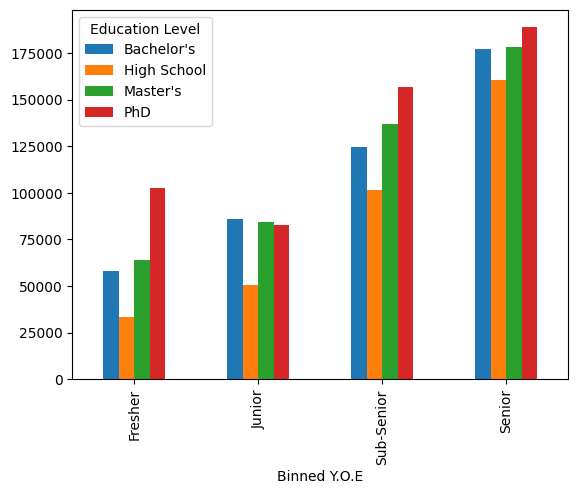

In [25]:
groups2 = df4.groupby(['Binned Y.O.E',"Education Level" ])["Salary"].mean()
df6 =groups2.unstack(level=1)
print(df6)
df6.plot.bar()


GRAPH 2 : Plot a pie chart to show the break down of employees in the age range -> (20-30),(31-40),(42-50),(51-65)

  Binned Age  male_count  female_count  other_count
0      20-30        1401          1467            4
1      31-40        1361          1085            4
2      41-50         770           389            0
3      51-65         134            49            6


<Axes: xlabel='Binned Age'>

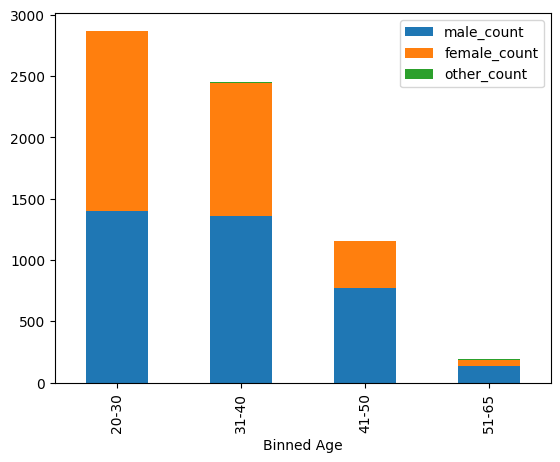

In [26]:
df['Binned Age'] = pd.cut(df["Age"], bins= [20,30,40,50,65], labels = ["20-30", "31-40", "41-50", "51-65"])
df7 = df["Binned Age"].value_counts()
df8 = pd.DataFrame(data=df7.index, columns=['Binned Age'])
age_bin = ["20-30", "31-40", "41-50", "51-65"]
male_count = []
for i in age_bin :
    male = df.loc[(df["Gender"] == "Male") & (df["Binned Age"] == i)].__len__()
    male_count.append(male)
female_count = []
for i in age_bin :
    female = df.loc[(df["Gender"] == "Female") & (df["Binned Age"] == i)].__len__()
    female_count.append(female)
other_count = []
for i in age_bin :
    other = df.loc[(df["Gender"] == "Other") & (df["Binned Age"] == i)].__len__()
    other_count.append(other)
df8["male_count"]=male_count
df8["female_count"]=female_count
df8["other_count"]=other_count
print(df8)
df8.plot(x="Binned Age", kind= "bar", stacked=True)